### Data Understanding

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [171]:
df=pd.read_csv("Desktop/Upgrad files/Predictive analytics-2/Advanced Regression/train.csv")

In [172]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [173]:
df.shape

(1460, 81)

In [174]:
# Inspecting Null values
round(100*((df.isnull().sum())/len(df.index)),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

#### Cleaning

In [175]:
# Imputing or Removing Null values based on relevance in data dictionary and requirements 

In [176]:
df['PoolQC']=df['PoolQC'].replace(np.nan,'No Pool') #Imputing

In [177]:
df['MiscFeature']=df['MiscFeature'].replace(np.nan,'None') #Imputing

In [178]:
df['Alley']=df['Alley'].replace(np.nan,'No Alley Access') #Imputing

In [179]:
df['Fence']=df['Fence'].replace(np.nan,'No Fence') #Imputing

In [180]:
df['FireplaceQu']=df['FireplaceQu'].replace(np.nan,'No Fireplace') #Imputing

In [181]:
df = df[~np.isnan(df['LotFrontage'])] #Removing the rows with null values

In [182]:
#Imputing
df[['GarageType','GarageYrBlt','GarageCond','GarageFinish','GarageQual']]=df[['GarageType','GarageYrBlt','GarageCond','GarageFinish','GarageQual']].replace(np.nan,'No Garage')

In [183]:
#Imputing
df[['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']]=df[['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']].replace(np.nan,'No Basement')

In [184]:
#Imputing
df[['MasVnrType','MasVnrArea']]=df[['MasVnrType','MasVnrArea']].replace(np.nan,'None')

In [185]:
df = df[df['Electrical'].notnull()]#Removing the rows with null values

In [186]:
#Taking out some redundant variables
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [187]:
#Inspecting
round(100*((df.isnull().sum())/len(df.index)),2).sort_values(ascending=False)

SalePrice        0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
Heating          0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofStyle        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
                ... 
EnclosedPorch    0.0
ScreenPorch      0.0
CentralAir       0.0
PoolArea         0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
MiscVal          0.0
MoSold           0.0
SaleType         0.0
GarageCars       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF     

In [188]:
df.shape

(1200, 77)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1459
Data columns (total 77 columns):
Id               1200 non-null int64
MSSubClass       1200 non-null int64
MSZoning         1200 non-null object
LotFrontage      1200 non-null float64
LotArea          1200 non-null int64
Street           1200 non-null object
Alley            1200 non-null object
LotShape         1200 non-null object
LandContour      1200 non-null object
Utilities        1200 non-null object
LotConfig        1200 non-null object
LandSlope        1200 non-null object
Neighborhood     1200 non-null object
Condition1       1200 non-null object
Condition2       1200 non-null object
BldgType         1200 non-null object
HouseStyle       1200 non-null object
OverallQual      1200 non-null int64
OverallCond      1200 non-null int64
RoofStyle        1200 non-null object
RoofMatl         1200 non-null object
Exterior1st      1200 non-null object
Exterior2nd      1200 non-null object
MasVnrType       1200 n

In [190]:
#Checking Duplicate data

In [191]:
df.Id.duplicated().sum()

0

#### EDA : Exploratory data analysis

In [192]:
def univariate_bivariate(data,var,dtype,hue=None):
    if dtype==0:
        plt.figure(figsize=(15,12))
        plt.subplot(121)
        plt.title('Distribution Plot')
        sns.distplot(data[var])
        
        plt.subplot(122)
        plt.title('Box Plot')
        sns.boxplot(data[var])
      
    if dtype==1:
        plt.figure(figsize=(10,8))
        plt.title('Count Plot')
        sns.countplot(x=var,data=data,hue=hue)

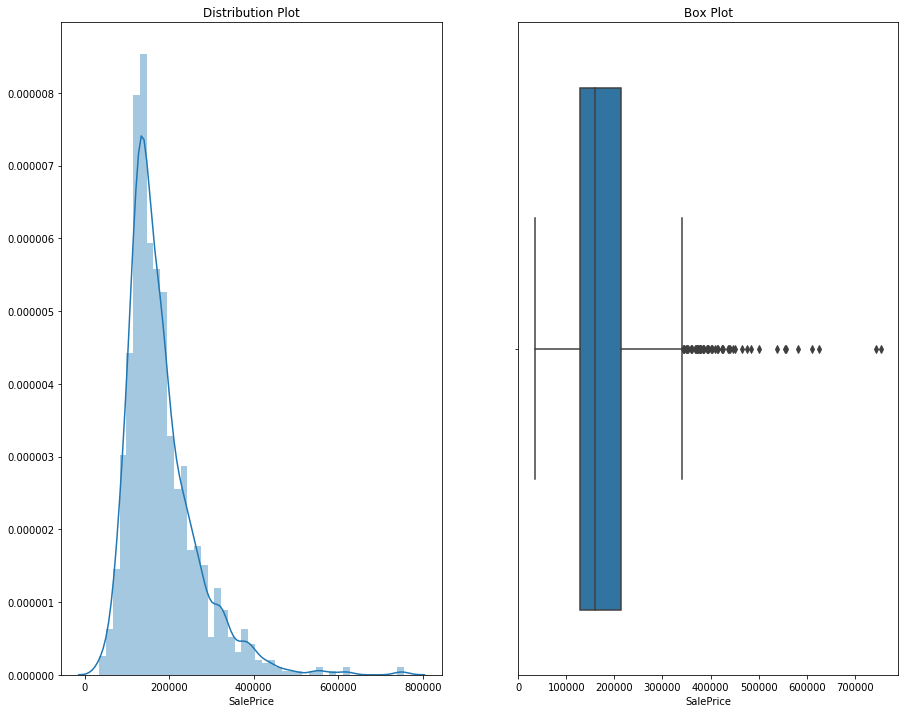

In [193]:
# Checking the distribution of the sale price
univariate_bivariate(df,var="SalePrice",dtype=0)

#### Inferences
25% of the houses are priced less than 130,000.
75 % of the houses are priced less tha just ove 200,000.
Their are certain outliers where the prices exceed 400,000

In [194]:
# Deriving a new categorical metric for assistance in Visualization

In [195]:
def Costrange(df):
    if df['SalePrice']>0 and df['SalePrice']<50000:
        return 'Very Low Cost'
    if df['SalePrice']>=50000 and df['SalePrice']<130000:
        return 'Low Cost'
    if df['SalePrice']>=130000 and df['SalePrice']<250000:
        return 'Medium Cost'
    if df['SalePrice']>=250000 and df['SalePrice']<350000:
        return 'High Cost'
    if df['SalePrice']>=350000:
        return 'Very High Cost'

In [196]:
df['CostRange']=df.apply(lambda df:Costrange(df),axis=1)

In [197]:
df['CostRange']

0          Medium Cost
1          Medium Cost
2          Medium Cost
3          Medium Cost
4            High Cost
5          Medium Cost
6            High Cost
8             Low Cost
9             Low Cost
10            Low Cost
11           High Cost
13           High Cost
15         Medium Cost
17            Low Cost
18         Medium Cost
19         Medium Cost
20           High Cost
21         Medium Cost
22         Medium Cost
23            Low Cost
25           High Cost
26         Medium Cost
27           High Cost
28         Medium Cost
29            Low Cost
30       Very Low Cost
32         Medium Cost
33         Medium Cost
34           High Cost
35           High Cost
             ...      
1425       Medium Cost
1426         High Cost
1427       Medium Cost
1428          Low Cost
1430       Medium Cost
1432          Low Cost
1433       Medium Cost
1434       Medium Cost
1435       Medium Cost
1436          Low Cost
1437    Very High Cost
1438       Medium Cost
1439       

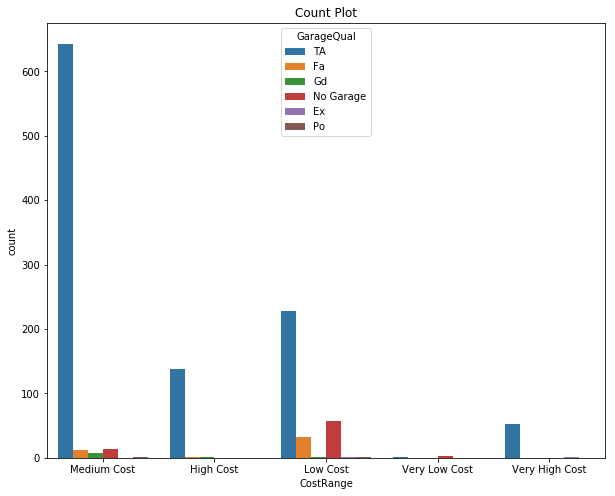

In [198]:
univariate_bivariate(df,var='CostRange',dtype=1,hue='GarageQual')

Low cost and medium cost homes have highest number of counts with no garage

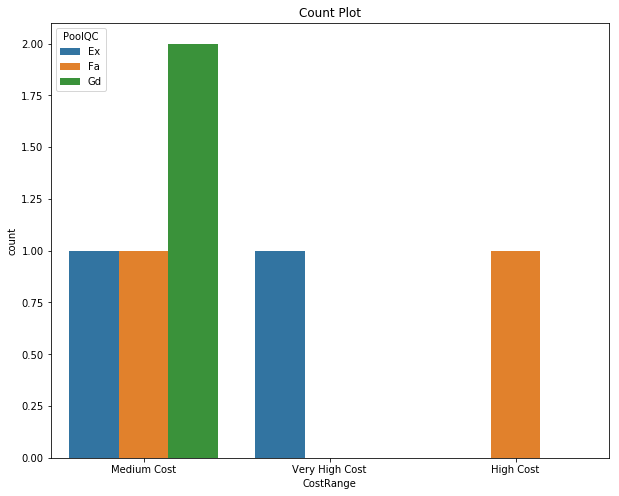

In [199]:
univariate_bivariate(df[~(df['PoolQC']=='No Pool')],var='CostRange',dtype=1,hue='PoolQC')

'Ex' , Excellent quality pools make up for Price range above 250000.Low cost homes dont have pools

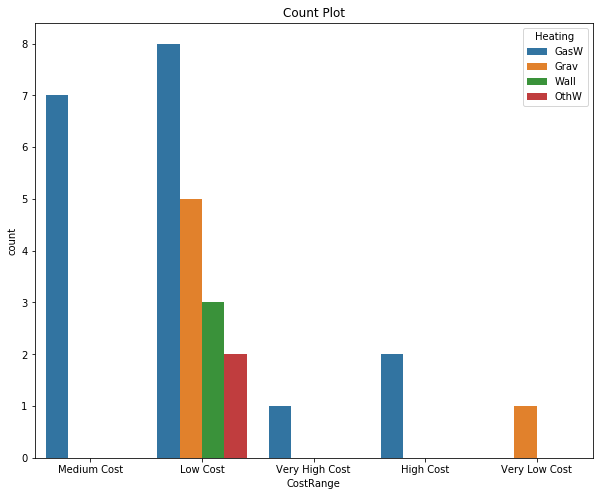

In [200]:
univariate_bivariate(df[~(df['Heating']=='GasA')],var='CostRange',dtype=1,hue='Heating')

'Gravity furnace' heating systems are common in low cost houses,Expensive houses don.t have gravity furnace heating system

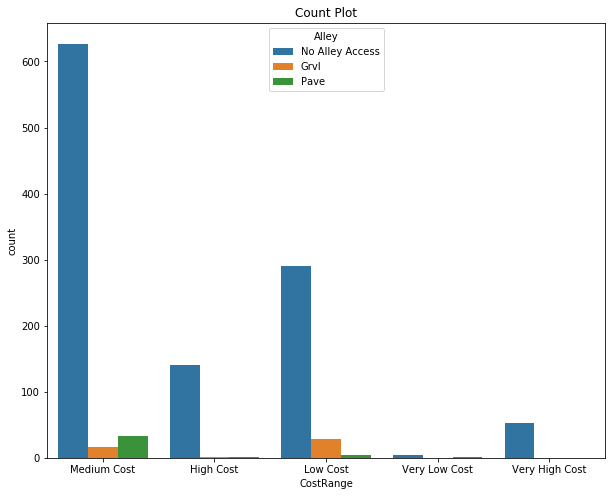

In [201]:
univariate_bivariate(df,var='CostRange',dtype=1,hue='Alley')

Gravel alley access account for low cost homes

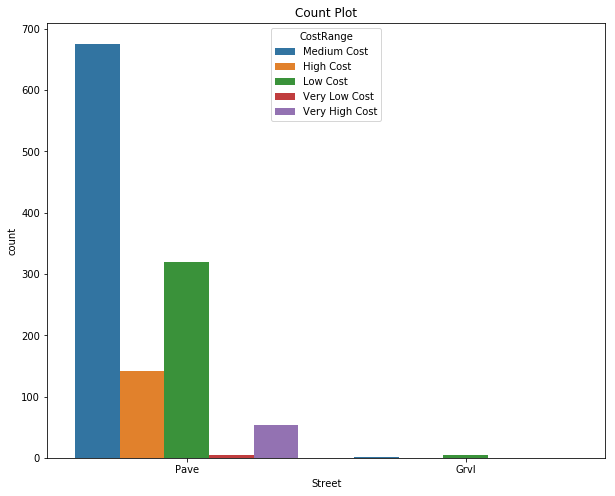

In [202]:
univariate_bivariate(df,var='Street',dtype=1,hue='CostRange')

Street is not a very intuitive indicator of the cost of the house

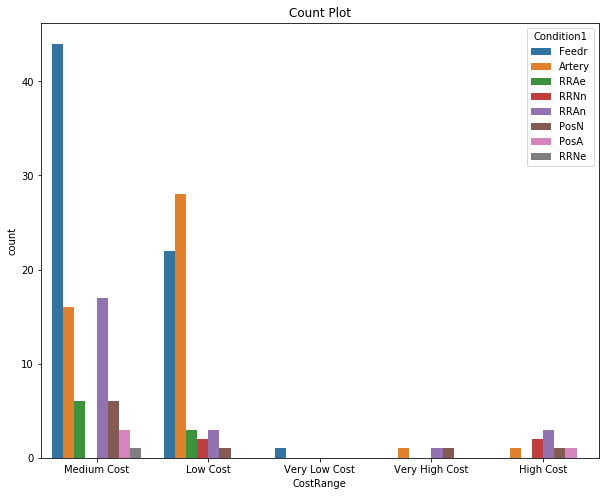

In [203]:
univariate_bivariate(df[~(df['Condition1']=='Norm')],var='CostRange',dtype=1,hue='Condition1')

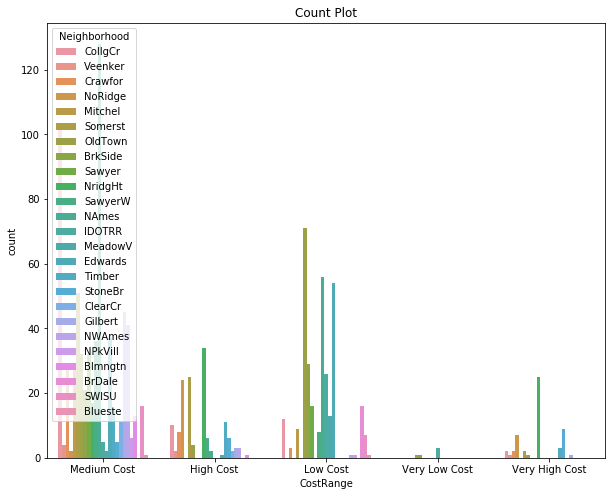

In [204]:
univariate_bivariate(df,var='CostRange',dtype=1,hue='Neighborhood')

In [205]:
df_numeric=df.select_dtypes(include=['float64','int64'])

In [206]:
df_numeric.drop('Id',axis=1,inplace=True)

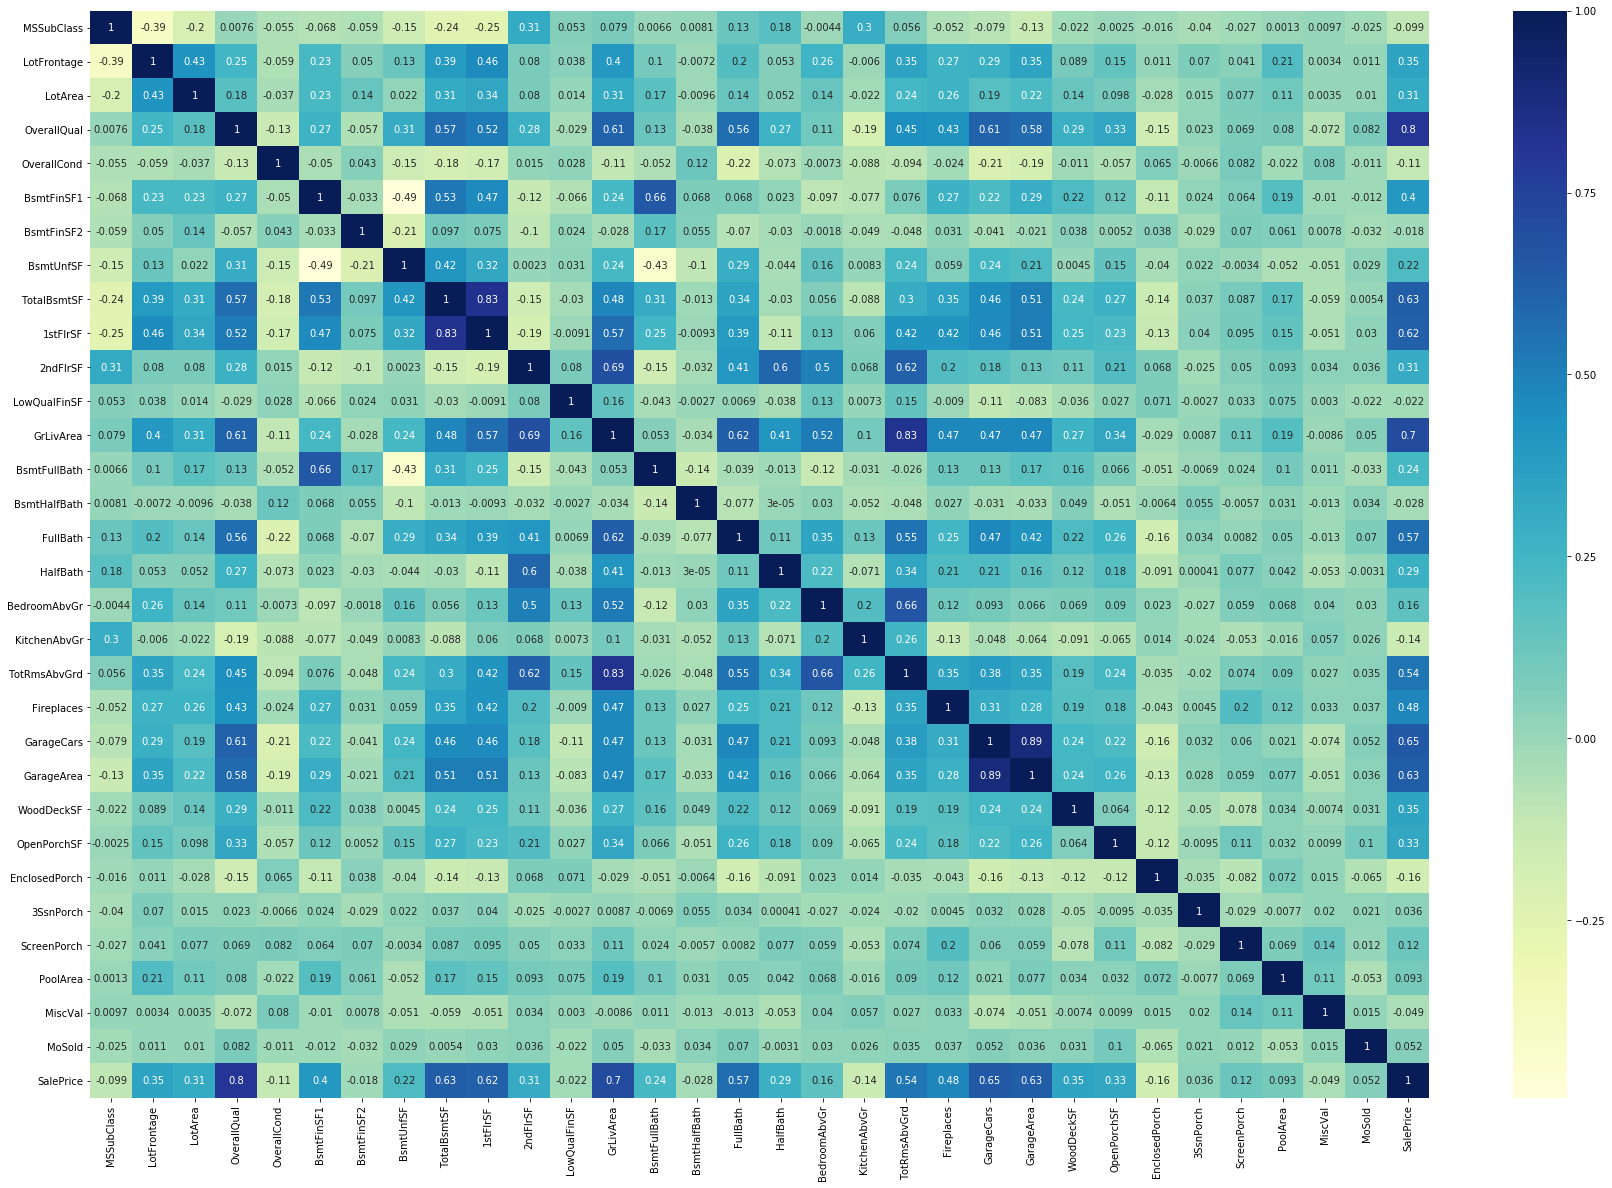

In [207]:
plt.figure(figsize=(30,20))
sns.heatmap(df_numeric.corr(),cmap='YlGnBu',annot=True)

Due to high correlation,Its evident that multicollinearity exists

#### Creating Dummy Features

In [208]:
# Mappin 'yes' and 'no' to 1 and 0
def binary_map(x):
    return x.map({'Y' : 1, 'N' : 0})

In [209]:
var=['CentralAir']
df[var]=df[var].apply(binary_map)

In [210]:
X=df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'SaleType',
       'SaleCondition']]

In [211]:
Y=df['SalePrice']

In [212]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,0,0,0,No Pool,No Fence,None,0,WD,Normal
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,0,0,0,No Pool,No Fence,None,0,WD,Normal
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,0,No Pool,No Fence,None,0,WD,Normal
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,272,0,0,0,No Pool,No Fence,None,0,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,0,No Pool,No Fence,None,0,WD,Normal


In [213]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [214]:
df_categorical=X.select_dtypes(include='object')

In [215]:
dummies=pd.get_dummies(df_categorical,drop_first=True)

In [216]:
dummies.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_No Alley Access', 'Alley_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=496)

In [217]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1459
Columns: 496 entries, MSZoning_FV to SaleCondition_Partial
dtypes: uint8(496)
memory usage: 630.6 KB


In [218]:
dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
10,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [219]:
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [220]:
#Dropping the original categorical variables
X.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],axis=1,inplace=True)

In [221]:
X=pd.concat([X,dummies],axis=1)

In [222]:
X.shape

(1200, 528)

In [223]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1459
Columns: 528 entries, Id to SaleCondition_Partial
dtypes: float64(1), int64(31), uint8(496)
memory usage: 930.6 KB


In [224]:
# Scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [225]:
#Extracting the features to standardise
X_int64=X.select_dtypes(include='int64')

In [226]:
X_int64.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [227]:
varlist=[ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']

In [228]:
# Scaling
X[varlist]=scale.fit_transform(X[varlist])

In [229]:
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1200.000000,1.200000e+03,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,726.493333,-3.719247e-17,70.047500,-6.848598e-17,1.123176e-16,8.604228e-18,-1.702342e-17,-1.831868e-17,1.369275e-17,3.941292e-17,...,0.003333,0.004167,0.100833,0.002500,0.850833,0.003333,0.008333,0.015000,0.800000,0.103333
std,420.791847,1.000417e+00,24.294727,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,...,0.057663,0.064442,0.301233,0.049958,0.356401,0.057663,0.090944,0.121603,0.400167,0.304521
min,1.000000,-8.625977e-01,21.000000,-1.091809e+00,-3.610917e+00,-3.255142e+00,-9.203174e-01,-2.784134e-01,-1.313950e+00,-2.366574e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.500000,-8.625977e-01,59.000000,-3.196639e-01,-7.917236e-01,-5.139697e-01,-9.203174e-01,-2.784134e-01,-7.678794e-01,-6.161157e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,723.500000,-1.665646e-01,69.000000,-8.781528e-02,-8.692514e-02,-5.139697e-01,-1.623923e-01,-2.784134e-01,-1.861469e-01,-1.561737e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1091.250000,2.974575e-01,80.000000,1.637195e-01,6.178733e-01,3.997542e-01,5.664647e-01,-2.784134e-01,5.426902e-01,5.566246e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,3.081590e+00,313.000000,2.590661e+01,2.732269e+00,3.140926e+00,1.123232e+01,9.262751e+00,3.892667e+00,1.127539e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
X.drop('Id',axis=1,inplace=True)

## Lasso

In [231]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [232]:
# Splitting into test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size = 0.3, random_state=100)

In [233]:
from sklearn.linear_model import Lasso
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   34.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [234]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.304018,0.035873,0.000795,0.000398,0.0001,{'alpha': 0.0001},-26550.740197,-41617.444416,-28808.909339,-36968.327847,...,-32192.371247,6028.397846,28,-6767.949678,-7000.766083,-6288.582020,-6967.032441,-6940.623737,-6792.990792,264.692962
1,0.295382,0.043492,0.000800,0.000400,0.001,{'alpha': 0.001},-26542.446562,-41591.896974,-28792.847775,-36944.186964,...,-32173.147634,6023.731726,27,-6767.857923,-7000.829771,-6288.705100,-6967.164841,-6940.732214,-6793.057970,264.687312
2,0.292613,0.042014,0.000996,0.000008,0.01,{'alpha': 0.01},-26463.782577,-41336.550559,-28638.460049,-36702.803659,...,-31991.157260,5968.742461,26,-6768.205742,-7001.646735,-6290.288925,-6968.745032,-6942.107613,-6794.198809,264.567137
3,0.300015,0.040290,0.000800,0.000400,0.05,{'alpha': 0.05},-26240.994918,-40211.846089,-28294.403029,-35648.606640,...,-31369.264787,5593.790263,25,-6772.737990,-7008.361548,-6298.174777,-6976.308649,-6948.188009,-6800.754195,264.207452
4,0.290806,0.035106,0.000802,0.000401,0.1,{'alpha': 0.1},-26067.184877,-38782.180859,-27909.049066,-34372.487262,...,-30633.784269,5094.572304,24,-6778.475668,-7017.480344,-6307.797350,-6986.322980,-6956.815317,-6809.378332,264.156005


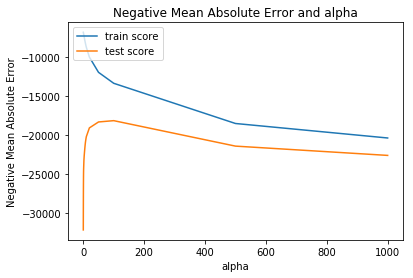

In [235]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [236]:
model_cv.best_params_

{'alpha': 100}

In [237]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [238]:
lasso.coef_

array([-5.37432461e+03, -2.91992792e+01,  4.93933819e+03,  1.35448741e+04,
        6.17265570e+03,  8.80651356e+03,  1.29544993e+03, -0.00000000e+00,
        7.71676638e+03,  1.08622320e+03,  0.00000000e+00,  4.06548104e+03,
       -1.89132607e+03,  2.33969648e+04,  3.37677945e+02, -1.41391141e+02,
        4.72474844e+03,  3.64960670e+03, -2.30437139e+03, -4.00139294e+03,
        7.10706039e+02,  3.73673401e+03,  8.29807584e+03,  0.00000000e+00,
        1.55737461e+03, -2.40466334e+01, -1.18833469e+03,  9.42023478e+02,
        1.53447926e+03,  2.39260322e+03, -9.71030245e+02,  0.00000000e+00,
        0.00000000e+00,  4.11911975e+03,  0.00000000e+00,  2.58472639e+04,
        1.04641560e+03, -4.30895998e+03,  1.05978010e+04, -0.00000000e+00,
        7.32134291e+02,  1.91705624e+04, -3.72571273e+03,  8.70524444e+03,
        1.49913334e+04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.27103326e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

### R2 Evaluation

In [239]:
from sklearn import metrics
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=100)
lm.fit(X_train, Y_train)

# predict
Y_train_pred = lm.predict(X_train)
print(metrics.r2_score(Y_train, Y_train_pred))
Y_test_pred = lm.predict(X_test)
print(metrics.r2_score(Y_test, Y_test_pred))

0.9441877400469003
0.8667658426990781


In [240]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
L=list(zip(cols, model_parameters))

In [241]:
len(L)

528

In [251]:
# Extracting the columns whose coeffecients were not restricted to zero
non_zeros=[]
for i in range (1,527):
    if L[i][1]!=0:
        non_zeros.append(L[i][0])
print(non_zeros)
len(non_zeros)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MSZoning_RL', 'Street_Pave', 'Alley_No Alley Access', 'Alley_Pave', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LandSlope_Mod', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'Hous

116

In [243]:
# Extracting the features with non zero coefficients for Ridge Regression
X_train=X_train[non_zeros]
X_test=X_test[non_zeros]

## Ridge

In [244]:
from sklearn.linear_model import Ridge
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [245]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003002,0.000633,0.000200,0.000400,0.0001,{'alpha': 0.0001},-20449.962809,-16923.713114,-16672.325021,-19575.997063,...,-17735.515453,1986.305715,5,-12427.549121,-12273.911235,-12077.560619,-12293.219183,-12774.207284,-12369.289488,231.232369
1,0.003403,0.000491,0.000600,0.000490,0.001,{'alpha': 0.001},-20450.621657,-16909.816381,-16676.984735,-19572.937231,...,-17733.454207,1986.206793,4,-12428.469444,-12275.277744,-12078.397544,-12293.035915,-12774.471501,-12369.930430,231.059999
2,0.002802,0.000749,0.000601,0.000490,0.01,{'alpha': 0.01},-20457.511895,-16779.105702,-16722.371887,-19543.230479,...,-17714.486022,1985.946572,3,-12437.696527,-12289.523391,-12089.510511,-12293.583935,-12778.958043,-12377.854481,229.133712
3,0.002802,0.000400,0.000200,0.000400,0.05,{'alpha': 0.05},-20487.301387,-16297.581140,-16922.425274,-19486.235686,...,-17667.827502,2002.543513,1,-12477.880951,-12409.921826,-12202.385941,-12330.728978,-12855.230463,-12455.229632,219.998586
4,0.003803,0.000400,0.000403,0.000493,0.1,{'alpha': 0.1},-20520.199782,-15852.906580,-17240.523743,-19483.256210,...,-17669.357922,2037.384659,2,-12528.058256,-12643.588754,-12408.254186,-12438.143535,-12987.631318,-12601.135210,209.900529


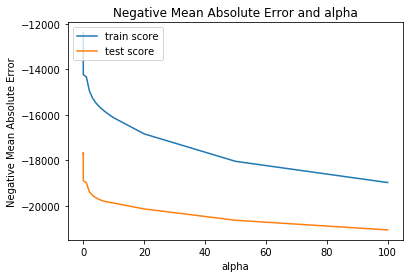

In [246]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [247]:
model_cv.best_params_

{'alpha': 0.05}

The most optimum value of parameter alpha is 0.05

In [248]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge.coef_

array([ -4065.53535785,   -162.51326418,   4804.53648682,  15252.93211642,
         5833.12384068,   2182.22174974,   1265.28939519,   3630.44146177,
          964.10960939,  10048.77691459,  -1033.94595848,  17054.12125471,
         2663.83672557,   1062.13394741,   6567.07482054,   4420.68409769,
        -1888.38247057,  -4343.63644201,   3706.23028164,   4603.56793381,
        10642.61111451,   2112.72271669,  -1513.76340368,   -304.23540387,
         1608.99977756,   2275.33038304,   1070.74072935,   -904.65196046,
         5643.26499062,  27258.13328362,  -2615.60855308,  -7977.5355986 ,
        13060.72739702,   2086.43877877,  26632.19230909,  -1735.25806243,
        17171.11981918,  19504.91260945,  10156.66301624, -10890.79230026,
        13427.81801223, -17590.95784383, -15606.40964553,  -7126.61704267,
        -6659.59153744,  42154.49142385,  29907.54395302,  -7838.73008762,
        -7898.31137108,   3722.63114734,  22100.24667525,  38100.48506496,
        13870.83148464, -

## R2 Evaluation

In [249]:
# model with optimal alpha
# ridge regression
lm = Ridge(alpha=0.05)
lm.fit(X_train, Y_train)

# predict
Y_train_pred = lm.predict(X_train)
print(metrics.r2_score(Y_train, Y_train_pred))
Y_test_pred = lm.predict(X_test)
print(metrics.r2_score(Y_test, Y_test_pred))

0.9566396348914036
0.8778433490213908


### Model Parameters

In [250]:
# Getting the list of resuling features along with the coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 147524.182),
 ('MSSubClass', -3616.631),
 ('LotFrontage', -20.118),
 ('LotArea', 5714.435),
 ('OverallQual', 10839.226),
 ('OverallCond', 6338.082),
 ('BsmtFinSF1', 8906.817),
 ('BsmtFinSF2', 1976.999),
 ('BsmtUnfSF', 7460.778),
 ('TotalBsmtSF', 1623.65),
 ('CentralAir', 4616.721),
 ('1stFlrSF', -2005.887),
 ('2ndFlrSF', 25329.058),
 ('LowQualFinSF', 57.287),
 ('GrLivArea', -666.322),
 ('BsmtFullBath', 4178.203),
 ('BsmtHalfBath', 3671.503),
 ('FullBath', -1923.63),
 ('HalfBath', -4323.944),
 ('BedroomAbvGr', -1607.782),
 ('KitchenAbvGr', 5499.714),
 ('TotRmsAbvGrd', 8546.548),
 ('Fireplaces', 2036.307),
 ('GarageCars', 643.481),
 ('GarageArea', -1089.501),
 ('WoodDeckSF', 929.316),
 ('OpenPorchSF', 1137.913),
 ('EnclosedPorch', 3460.213),
 ('3SsnPorch', -905.258),
 ('ScreenPorch', 4915.46),
 ('PoolArea', 62864.656),
 ('MiscVal', -1267.542),
 ('MSZoning_FV', -10790.813),
 ('MSZoning_RH', 16890.381),
 ('MSZoning_RL', 2752.965),
 ('MSZoning_RM', 20591.711),
 ('Street_Pave',

## Hyperparameter Tuning

### For Ridge

In [255]:
from sklearn.feature_selection import RFE
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 100))}]

# specify model
lm = Ridge()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,  param_grid = hyper_params,  scoring= 'r2',  cv = folds, verbose = 1,return_train_score=True)      
# fit the model
model_cv.fit(X_train, Y_train)            

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   34.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [257]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.156107,0.019752,0.000800,4.000906e-04,1,{'n_features_to_select': 1},-0.000016,-0.000784,-0.000409,-0.000009,...,-0.000269,0.000296,48,0.050613,0.031914,0.050436,0.050094,0.029032,0.042418,0.009797
1,0.143708,0.009866,0.000400,4.904465e-04,2,{'n_features_to_select': 2},-0.000063,-0.000994,-0.000275,-0.000001,...,-0.008544,0.016424,49,0.079154,0.061999,0.075195,0.080118,0.086099,0.076513,0.008053
2,0.143302,0.006678,0.000600,4.901350e-04,3,{'n_features_to_select': 3},-0.016193,-0.001213,0.100893,-0.000025,...,0.008380,0.048620,47,0.155885,0.088262,0.159666,0.108422,0.111619,0.124771,0.028139
3,0.145299,0.005751,0.000803,4.017780e-04,4,{'n_features_to_select': 4},0.009799,-0.001474,0.110557,-0.000076,...,0.037710,0.044889,46,0.265023,0.098553,0.171534,0.133130,0.208749,0.175398,0.058055
4,0.141602,0.006552,0.000400,4.903881e-04,5,{'n_features_to_select': 5},0.012137,-0.001462,0.124480,0.034274,...,0.049245,0.046025,45,0.278285,0.098615,0.192497,0.151949,0.217398,0.187749,0.060539
5,0.140900,0.005710,0.000801,4.003526e-04,6,{'n_features_to_select': 6},0.012087,-0.001465,0.295578,0.346398,...,0.147986,0.145350,44,0.296715,0.098619,0.469109,0.435894,0.238771,0.307822,0.134962
6,0.137096,0.005296,0.000200,4.002571e-04,7,{'n_features_to_select': 7},0.045238,0.577533,0.410147,0.408654,...,0.368839,0.174759,43,0.310427,0.708876,0.601681,0.555451,0.470145,0.529316,0.133847
7,0.134696,0.003202,0.000600,4.902907e-04,8,{'n_features_to_select': 8},0.375114,0.571667,0.412228,0.419823,...,0.467504,0.081277,42,0.505377,0.721319,0.609656,0.611564,0.574403,0.604464,0.069935
8,0.140900,0.006119,0.000800,7.488508e-04,9,{'n_features_to_select': 9},0.593273,0.627020,0.420974,0.410656,...,0.522939,0.089857,41,0.589934,0.731323,0.613951,0.619216,0.597052,0.630295,0.051634
9,0.136297,0.005273,0.000600,4.897855e-04,10,{'n_features_to_select': 10},0.591203,0.622166,0.453105,0.407535,...,0.527225,0.082637,39,0.595602,0.749293,0.628561,0.626863,0.604393,0.640942,0.055647


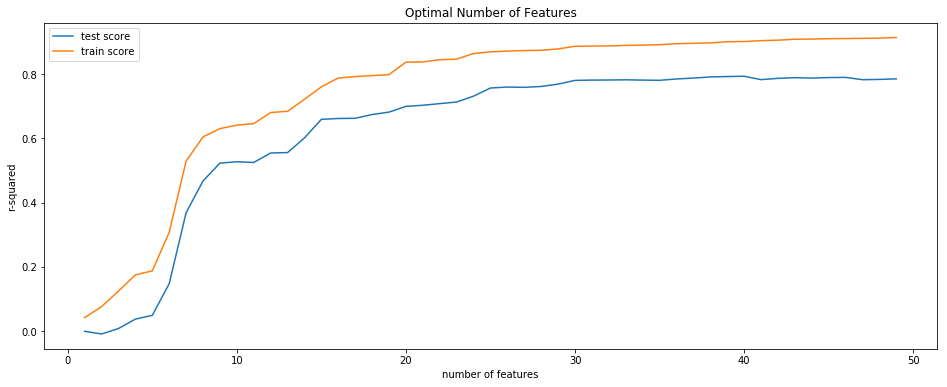

In [258]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [259]:
model_cv.best_params_

{'n_features_to_select': 40}

In [260]:
# final model
n_features_optimal = 40

lm = Ridge()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
Y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.8714095156096133


### For Lasso

In [265]:
from sklearn.feature_selection import RFE
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 100)}]

# specify model
lm = Lasso()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,  param_grid = hyper_params,  scoring= 'r2',  cv = folds, verbose = 1,return_train_score=True)      
# fit the model
model_cv.fit(X_train, Y_train)            

Fitting 5 folds for each of 839 candidates, totalling 4195 fits


[Parallel(n_jobs=1)]: Done 4195 out of 4195 | elapsed:  5.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,...20, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [266]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.644761,0.056816,0.000600,4.898625e-04,1,{'n_features_to_select': 1},-0.000085,-0.001000,-2.265618e-04,-0.000005,...,-0.000324,0.000354,837,0.067517,0.042573,0.067282,0.066826,0.068847,0.062609,0.010040
1,0.633249,0.057090,0.000600,4.901350e-04,2,{'n_features_to_select': 2},-0.000296,-0.001496,-4.929103e-05,-0.000108,...,-0.000513,0.000530,838,0.108040,0.082747,0.107647,0.106929,0.107729,0.102618,0.009942
2,0.653665,0.058695,0.000801,4.003286e-04,3,{'n_features_to_select': 3},-0.000624,-0.002051,-7.331694e-08,-0.000336,...,-0.000805,0.000707,839,0.146283,0.117858,0.140831,0.144775,0.141709,0.138291,0.010407
3,0.653267,0.057464,0.000801,4.003287e-04,4,{'n_features_to_select': 4},-0.028751,-0.002569,1.875021e-02,-0.000664,...,0.017247,0.043800,836,0.224473,0.129526,0.163369,0.177853,0.222125,0.183469,0.036114
4,0.654265,0.060914,0.000400,4.900960e-04,5,{'n_features_to_select': 5},-0.029288,0.007228,2.618604e-01,-0.161065,...,0.037669,0.141663,835,0.235952,0.154701,0.462577,0.206600,0.243837,0.260734,0.105654
5,0.639257,0.059135,0.000403,4.937953e-04,6,{'n_features_to_select': 6},0.001692,0.277111,2.617183e-01,-0.170461,...,0.155762,0.209816,834,0.315254,0.451838,0.463028,0.218547,0.480463,0.385826,0.102212
6,0.658060,0.058909,0.000400,4.902128e-04,7,{'n_features_to_select': 7},0.000602,0.277286,3.394274e-01,-0.135976,...,0.178047,0.209418,833,0.327332,0.452861,0.588045,0.236445,0.481298,0.417196,0.122733
7,0.651272,0.077430,0.000598,4.884394e-04,8,{'n_features_to_select': 8},0.034240,0.277395,4.190611e-01,0.232194,...,0.274375,0.140361,832,0.340843,0.453285,0.619380,0.499820,0.481609,0.478988,0.089326
8,0.828590,0.284453,0.001001,4.672031e-07,9,{'n_features_to_select': 9},0.367467,0.445801,4.187447e-01,0.232531,...,0.406689,0.109415,831,0.531638,0.556176,0.624733,0.500717,0.587606,0.560174,0.043095
9,0.720020,0.071537,0.000601,4.903297e-04,10,{'n_features_to_select': 10},0.351274,0.503771,4.284015e-01,0.232739,...,0.416946,0.117386,830,0.532720,0.560227,0.629510,0.501072,0.594870,0.563680,0.045159


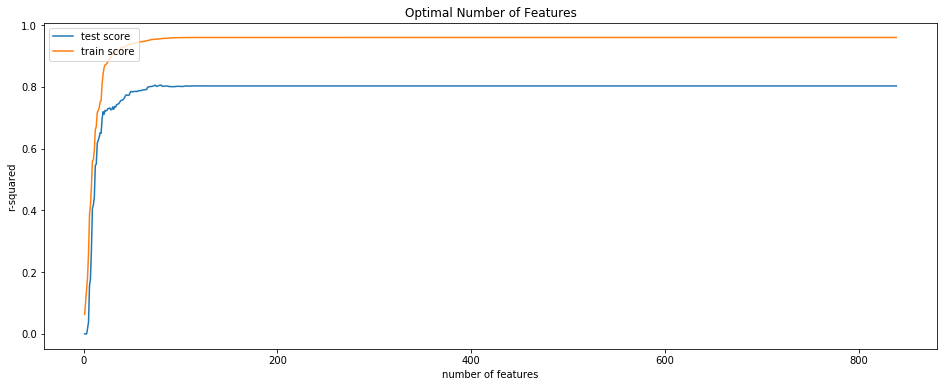

In [267]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [268]:
model_cv.best_params_

{'n_features_to_select': 80}

In [269]:
# final model
n_features_optimal = 80

lm = Lasso()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
Y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.8377357915274712


### End